**Name:** Yutika Rege

**PRN:** 1901202012

**DS303:** Machine Learning 1

**Title:** Applications of Data Visualization

**Problem Statement:** Write Python code to do the following:

* Provide insights from the superstore data set.

* Using various plots summarize the data.

* Analyze the data of based on orders and return tab. Draw suitable plot for the same.

**Importing all the necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("Superstore.xls")

**Performing some basic EDA:**

In [4]:
print("No. of rows in the dataset:-",df.shape[0],"\nNo. of columns in the dataset:-",df.shape[1])

No. of rows in the dataset:- 9994 
No. of columns in the dataset:- 21


In [5]:
df.iloc[:5,1:10]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale


In [6]:
df.iloc[:5,11:21]

,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.isna().sum().sum()

0

This dataset has no missing values whatsoever so we needn't impute or remove values. 

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


There are negative values in the "Profit" variable but by domain knowledge, one can assume that a profit may as well be negative or in other words - a loss. 

## Univariate analysis:

**Q1. Make a pie chart that depicts the percentage breakdown of the variable "ship-mode".**

In [9]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Standard class:59.72%
Second class:19.46%
First class:15.39%
Same day:5.46%


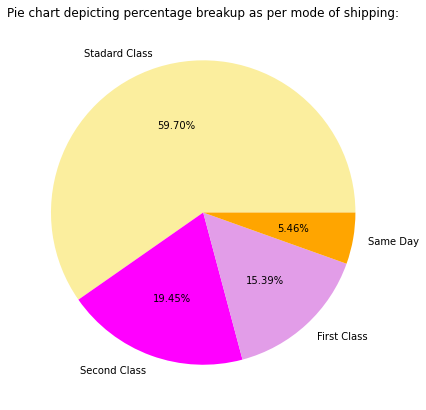

In [10]:
std_class = round((5968/9994)*100,2)
sec_class = round((1945/9994)*100,2)
fir_class = round((1538/9994)*100,2)
same_day = round((543/9944)*100,2)

print(f"Standard class:{std_class}%\nSecond class:{sec_class}%\nFirst class:{fir_class}%\nSame day:{same_day}%")
fig = plt.figure(figsize=(10,7))
per = [std_class,sec_class,fir_class,same_day]
lab = ["Stadard Class","Second Class","First Class","Same Day"]
col = ["#FBEE9E","magenta","#E29DE8","orange"]

plt.pie(per,labels = lab, autopct='%0.2f%%',colors = col)
plt.title("Pie chart depicting percentage breakup as per mode of shipping:")
plt.show()

**Comments:**

Maximum persons get their packages delivered in the standard delivery mode whereas only a few (5.5%) people seem to have availed the same day delivery mode. The populations for second and first class are almost similar magnitude-wise. The company should try to provide at least first class delivery if not same day delivery to most customers so as to retain the pre-existing ones and attract new ones thereafter.

In [11]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

**Q2. Visualise the categories as well as sub-catogories of the various products.**

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


Bar plot:
 AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Percentage(%)')

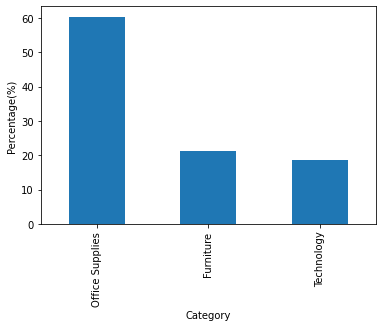

In [12]:
print(df["Category"].value_counts())

# in percentage
per=(df["Category"].value_counts()/len(df["Category"]))*100 
print("\n\nBar plot:\n",per.plot.bar())

plt.xlabel("Category")
plt.ylabel("Percentage(%)")

Bar plot:
 AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Percentage(%)')

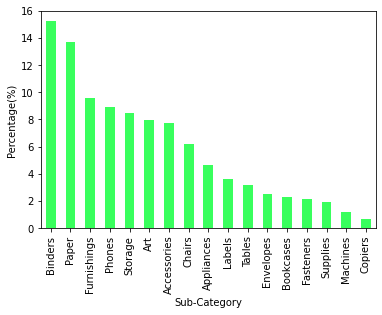

In [13]:
# in percentage
per1=(df["Sub-Category"].value_counts()/len(df["Sub-Category"]))*100 
print("Bar plot:\n",per1.plot.bar(color="#39FF5D"))
plt.xlabel("Sub-Category")
plt.ylabel("Percentage(%)")

**Comments:** It can be seen in the barplot that items which are bought the most are office supplies followed by furniture and then technological devices. To get more insights, we will plot which office supplies are actually profitable for this company. 

## Bivariate analysis:

**We will start by visualising a heatmap for ad hoc correlation analysis:**

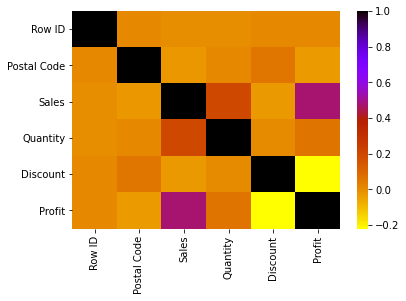

In [14]:
sns.heatmap(df.corr(),cmap="gnuplot_r")

**Q3. Plot the most profitable products as per categories.**

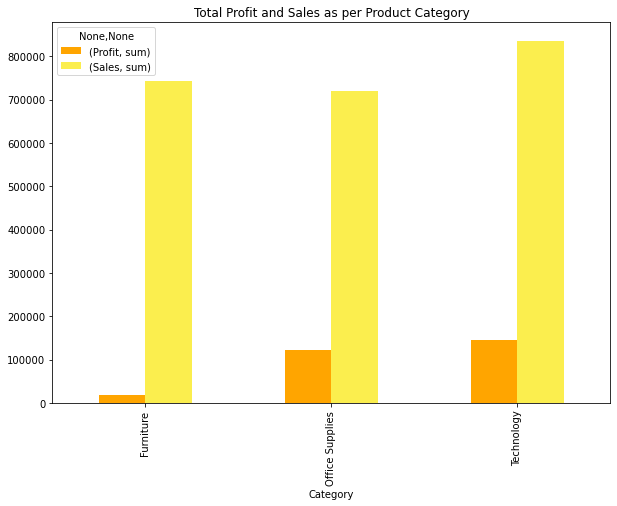

In [15]:
df.groupby("Category")["Profit","Sales"].agg(["sum"]).plot.bar(figsize=(10,7),color=["orange","#FBEE4E"]);
plt.title("Total Profit and Sales as per Product Category");

**Comment:** We could finally conclude that although the least selling category is technoligical devices, it is indeed the most profitable followed by office supply and of course, the least profitable category is furniture. This would mean that the company must try to focus more on office supplies and technology related items and find ways to enhance the sales thereby profit. 

**Q4. Find out particular segments of customers as per the region to understand the market.**

Text(0.5, 1.0, 'Region-wise count of the different customer segments ')

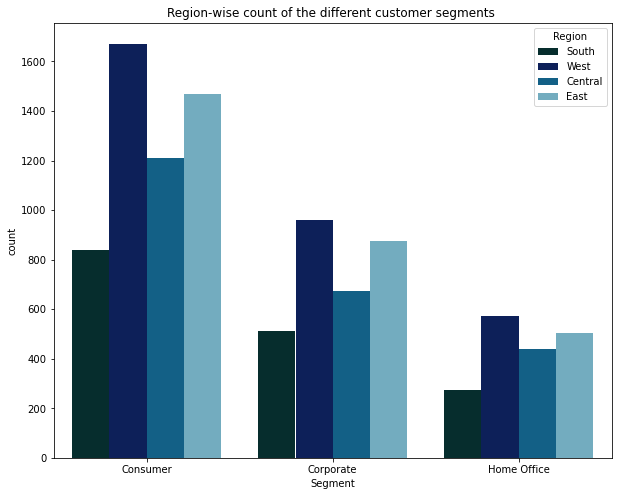

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="Segment", hue="Region",palette="ocean")
plt.title("Region-wise count of the different customer segments ")

**Comment:** Most of the customers fall under the "consumer" category. The market in the west region seems to be the most across all consumer categories and the least in the south region. The corporate segment is median and the lowest count of customers is naturally in the home office category. We could assume that the target audience of this company is the "consumer" category; looking at the sheer frequency however, we can only conclude after plotting and finding out the most profitable customer segment.

**Q5. Find out the most profit making consumer category.**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

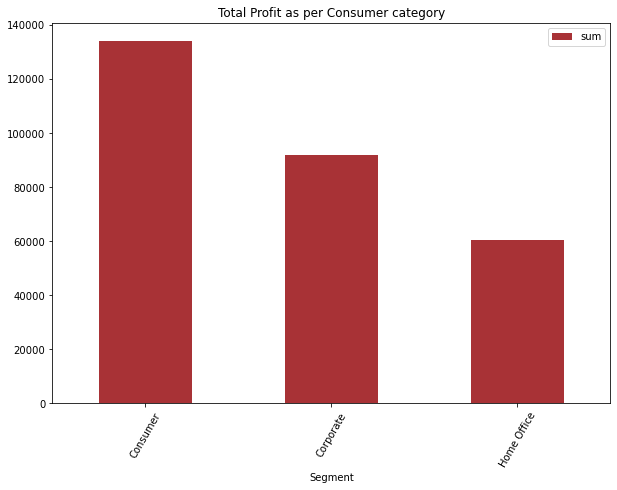

In [17]:
df.groupby("Segment")["Profit"].agg(["sum"]).plot.bar(figsize=(10,7),color=["#a83236"]);
plt.title("Total Profit as per Consumer category")
plt.xticks(rotation=60)

**Comment:** To confirm our speculation of the company's assumption, the highest profit making customer segment includes indeed the independent consumers themselves. 

## Multivariate analysis:

**Q6. Which are the "top 10" most profitable cities for this superstore as per the customer segment?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

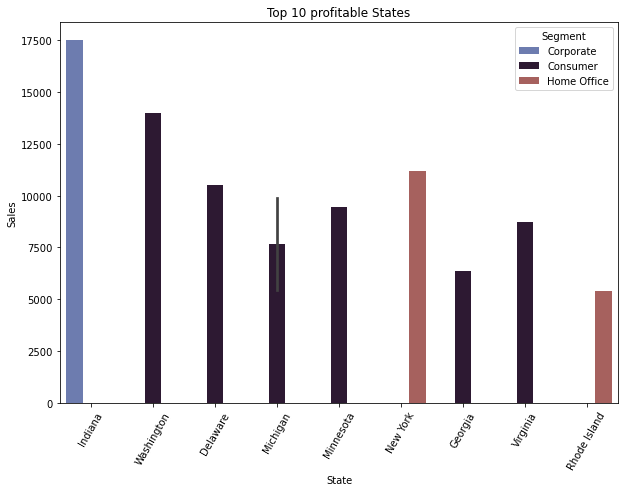

In [18]:
top10_city = df.sort_values(["Profit"],ascending=False).head(10)
fig = plt.figure(figsize=(10,7))
sns.barplot(data=top10_city,x="State", y="Sales",hue="Segment",palette="twilight")
plt.title("Top 10 profitable States")
plt.xticks(rotation=60)

**Comment:** Indiana state contributes the maximum sales especially in the corporate segment whereas the state of Rhode Island contributes the least amount of sales in the Home Office category.

**Q7. Plot the most suitable graph so as to find the region that is the most profitable for a certain category.**

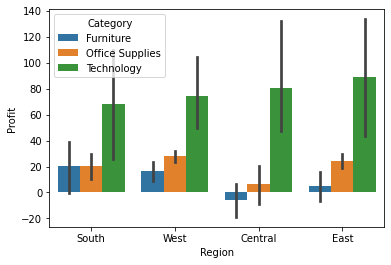

In [38]:
sns.barplot(data=df,y="Profit",x="Region",hue ="Category")
fig.set_figheight(50)
fig.set_figwidth(10)

**Comment:** The least profitable of all regions is the south as observed in the previous graph. Out of this, the least profitable category for all regions is furniture and the most profitable is the technological devices which counters our previous observation of the most profitable category as being the office supplies. The furniture category leans more towards the negative profit (loss) side and eventually plummets in the central region. 